In [21]:
import matplotlib.pyplot as plt

In [5]:
%run '../scripts/execute_query.ipynb'

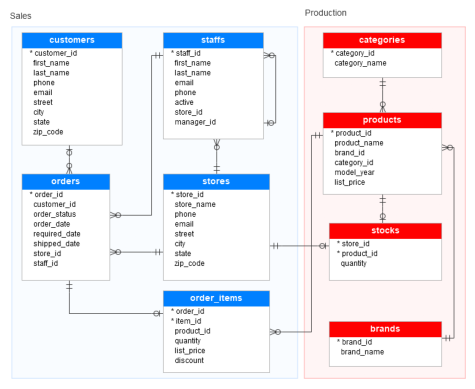

In [10]:
%run 'schema.ipynb'

#### Which brand has the most products in the store?

In [36]:
query="""
SELECT b.brand_name,
COUNT(p.product_id) AS product_count
FROM brands b
LEFT JOIN products p
USING (brand_id)
GROUP BY b.brand_id
ORDER BY product_count DESC;
"""
df=execute_query(query)
df

,brand_name,product_count
0,Trek,135
1,Electra,118
2,Surly,25
3,Sun Bicycles,23
4,Haro,10
5,Strider,3
6,Pure Cycles,3
7,Heller,3
8,Ritchey,1


Text(0.5, 1.0, 'Product Count per Brand')

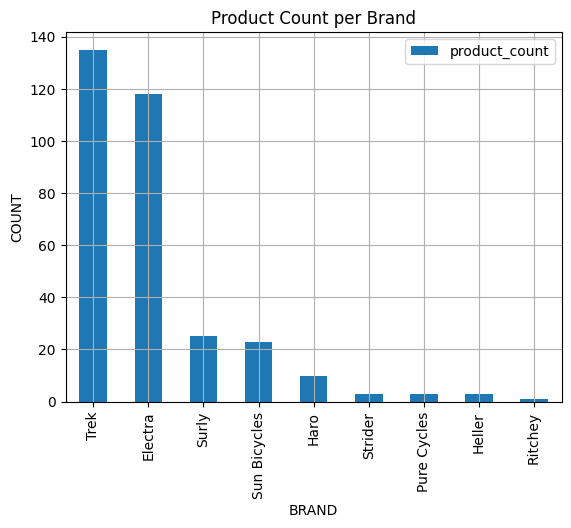

In [39]:
df.plot(kind='bar',x='brand_name' ,y='product_count',legend='False',grid='True')
plt.xlabel('BRAND')
plt.ylabel('COUNT')
plt.title("Product Count per Brand")